# Grouping spectra

This is a (hopefully) short notebook about grouping of PHA spectra in Sherpa. I'm not planning to discuss
everythng you can do, but let's see how this goes. The problem is that the addition of grouping support
for PHA spectra complicates the API (are we working on the grouped or ungrouped data), so it's not as easy as I would like it to be to get at the data we want.

## Setting up

The notebook assumes you have CIAO 4.16 installed, so you
should just have to run the following command from your shell (in the directory that contains `grouping-spectra.ipynb` and the `3c273*` files:

    % pip install jupyter  # not needed for ciao-install but is for a conda install of CIAO
    % jupyter notebook
    ...
    ... a lot of screen output
    ...
    
If you already have a web browser running then you will hopefully have a tab opened for you that lets
you start up this notebook, otherwise the screen output will show you the web address to use.

## Changes

- December 2021 - sometime around CIAO 4.12 the [Can I re-create the plot?](#Can-I-re-create-the-model-plot?) section needed a re-write, so I've finally upated it.
- March 14 2019 - added a [section on errors](#Errors)
- March 12 2019 - original version

## When was this last run, and with that version of Sherpa?

In [1]:
import time
time.ctime()

'Wed Oct  1 13:04:17 2025'

In [2]:
!pip show sherpa

Name: sherpa
Version: 4.18.0rc1
Summary: Modeling and fitting package for scientific data analysis
Home-page: https://cxc.harvard.edu/sherpa/
Author: 
Author-email: Smithsonian Astrophysical Observatory / Chandra X-Ray Center <cxchelp@cfa.harvard.edu>
License-Expression: GPL-3.0-or-later
Location: /home/dburke/micromamba/envs/throwxspec313/lib/python3.13/site-packages
Requires: numpy
Required-by: 


The following command doesn't appear to be necessary, but I include it to indicate I expect the
Matplotlib plots to appear within the notebook), and then load in NumPy and Matplotlib for later use.

In [3]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt

## Setting up

I am going to load up the `3c273` data set up an absorbed powerlaw - with parameter values taken
from a fit - just so that we have some data to work with:

In [4]:
from sherpa.astro import ui

ui.load_pha('data/pha/3c273.pi')
ui.subtract()

ui.notice(0.5, 7.0)

ui.set_source(ui.xsphabs.gal * ui.powlaw1d.pl)

gal.nh = 0.03616
pl.gamma = 2.0322
pl.ampl = 1.969e-4

failed to import sherpa.image.ds9_backend due to 
'RuntimeErr: DS9Win unusable: Could not find ds9 on your PATH'
statistical errors were found in file 'data/pha/3c273.pi'
but not used; to use them, re-read with use_errors=True
read ARF file data/pha/3c273.arf
read RMF file data/pha/3c273.rmf
statistical errors were found in file 'data/pha/3c273_bg.pi'
but not used; to use them, re-read with use_errors=True
read background file data/pha/3c273_bg.pi
dataset 1: 0.00146:14.9504 -> 0.4672:9.8696 Energy (keV)


With this setup we can create a plot of the grouped (and filtered) data, along
with the best-fit model:

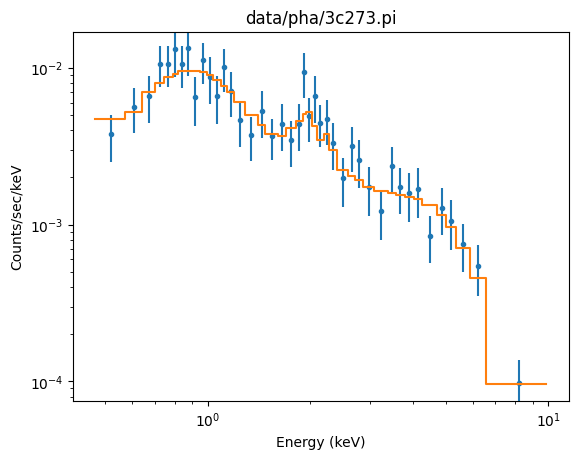

In [5]:
ui.set_xlog()
ui.set_ylog()
ui.plot_fit()

## Can I access the data used to create the plot?

We have accessor routines that represent the data used in the plot, but I also hope to show
how you can re-create this data (or at least some of the data) manually below.

First, with the accessor routines:

 - [get_data_plot](https://sherpa.readthedocs.io/en/4.11.0/ui/api/sherpa.astro.ui.get_data_plot.html)
 - [get_model_plot](https://sherpa.readthedocs.io/en/4.11.0/ui/api/sherpa.astro.ui.get_model_plot.html)
 - [get_fit_plot](https://sherpa.readthedocs.io/en/4.11.0/ui/api/sherpa.astro.ui.get_fit_plot.html)
 
### A note on documentation links

I am going to use the documentation from the 
["standalone" version of Sherpa](https://sherpa.readthedocs.io/en/4.11.0/) rather than CIAO,
as they are better integrated with the Sherpa API - that is, you can get to some of the
class-based documentation such as
[the DataPlot class](https://sherpa.readthedocs.io/en/4.11.0/plots/api/sherpa.astro.plot.DataPlot.html).

### Back to the scheduled programming

The `get_xxx_plot` routines return an object that contains the data needed to create the plot,
and are evaluated at the time they are called (that is, if you call `plot_fit`, then change the
energy filter or alter  model parameter, and then call `get_fit_plot` the results will
represent the changes you have just made, not the data used to create the on-screen plot).

I start with the `fit` plot which is a combination of a `data` plot and a `model` plot. Note that the plot class (the item returned by `get_fit_plot`) has special support for Jupyter notebooks (new to Sherpa 4.12.2) and so shows an actual plot of the data:

In [6]:
fplot = ui.get_fit_plot()
fplot

The `dataplot` and `modelplot` attributes contain
[`DataPlot`](https://sherpa.readthedocs.io/en/4.12.2/plots/api/sherpa.astro.plot.DataPHAPlot.html)
and
[`ModelPlot`](https://sherpa.readthedocs.io/en/4.12.2/plots/api/sherpa.astro.plot.ModelPHAHistogram.html)
instances respectively (in this case they are the same as calling `get_data_plot` and `get_model_plot` [$*$]):

[$*$] Prior to Sherpa 4.12.2 these two fields contained slightly-different plot types, but these have been replaced with the above versions **when** displaying PHA data.

In [7]:
type(fplot.dataplot)

sherpa.astro.plot.DataPHAPlot

In [8]:
type(fplot.modelplot)

sherpa.astro.plot.ModelPHAHistogram

In [9]:
print(fplot)

dataplot   = data/pha/3c273.pi
xlo    = [0.4672,0.5694,0.6424,0.7008,0.7446,0.7884,0.8176,0.8614,0.8906,0.949 ,
 0.9928,1.0366,1.095 ,1.1388,1.1972,1.2848,1.4016,1.4746,1.606 ,1.6936,
 1.8104,1.898 ,1.9418,2.0294,2.0878,2.19  ,2.2776,2.3944,2.5842,2.7156,
 2.8616,3.0806,3.3872,3.5624,3.796 ,4.0296,4.2486,4.7158,5.0224,5.3728,
 5.8984,6.57  ]
xhi    = [0.5694,0.6424,0.7008,0.7446,0.7884,0.8176,0.8614,0.8906,0.949 ,0.9928,
 1.0366,1.095 ,1.1388,1.1972,1.2848,1.4016,1.4746,1.606 ,1.6936,1.8104,
 1.898 ,1.9418,2.0294,2.0878,2.19  ,2.2776,2.3944,2.5842,2.7156,2.8616,
 3.0806,3.3872,3.5624,3.796 ,4.0296,4.2486,4.7158,5.0224,5.3728,5.8984,
 6.57  ,9.8696]
y      = [3.7716e-03,5.6355e-03,6.6602e-03,1.0656e-02,1.0656e-02,1.3201e-02,
 1.0576e-02,1.3320e-02,6.4805e-03,1.1169e-02,8.8004e-03,6.6003e-03,
 1.0064e-02,7.1043e-03,4.6563e-03,3.7142e-03,5.3282e-03,3.6696e-03,
 4.4002e-03,3.4623e-03,4.4002e-03,9.4723e-03,4.9124e-03,6.6602e-03,
 4.4643e-03,4.7362e-03,3.3301e-03,1.9756e-03,3.1574e-03,2.5922

The objects have a `plot` method which will create a plot, so you can access the components separately:

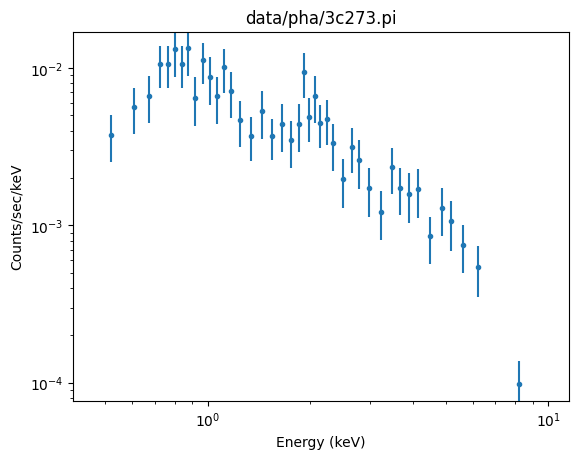

In [10]:
fplot.dataplot.plot()

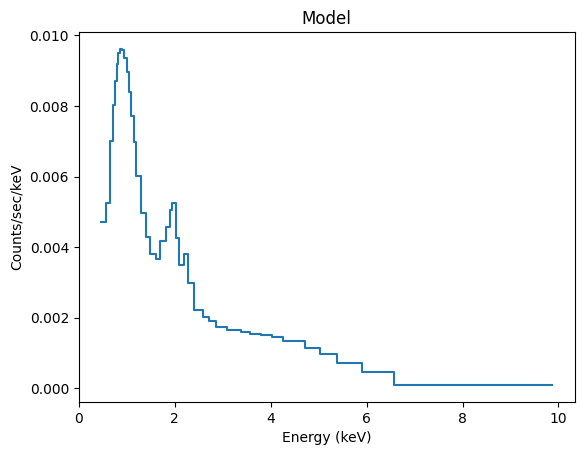

In [11]:
fplot.modelplot.plot()  # note: this does not pick up the x/y scaling unlike the data plot

or you can plot them together:

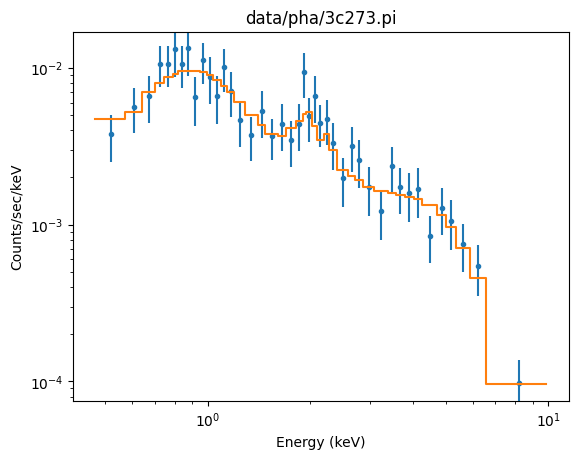

In [12]:
fplot.plot()

If you want, you can access the data directly, such as the data points using the
`x`, `y`, and `yerr` fields (here I display the first five values and you can see
they match the values used in the plot):

In [13]:
list(zip(fplot.dataplot.xlo, fplot.dataplot.xhi, fplot.dataplot.y, fplot.dataplot.yerr))[0:5]

[(np.float64(0.46720001101493835),
  np.float64(0.5694000124931335),
  np.float64(0.0037716153818110744),
  np.float64(0.0012631612592398642)),
 (np.float64(0.5694000124931335),
  np.float64(0.6424000263214111),
  np.float64(0.005635473017161331),
  np.float64(0.0018124040722667545)),
 (np.float64(0.6424000263214111),
  np.float64(0.7008000016212463),
  np.float64(0.006660236700166901),
  np.float64(0.002208979162615874)),
 (np.float64(0.7008000016212463),
  np.float64(0.7445999979972839),
  np.float64(0.010656375094869093),
  np.float64(0.003159064457840299)),
 (np.float64(0.7445999979972839),
  np.float64(0.7883999943733215),
  np.float64(0.010656375094869093),
  np.float64(0.003159064457840299))]

We can also get at the model data:

In [14]:
list(zip(fplot.modelplot.xlo, fplot.modelplot.xhi, fplot.modelplot.y))[0:5]

[(np.float64(0.46720001101493835),
  np.float64(0.5694000124931335),
  np.float64(0.004722182522753494)),
 (np.float64(0.5694000124931335),
  np.float64(0.6424000263214111),
  np.float64(0.005262864199880122)),
 (np.float64(0.6424000263214111),
  np.float64(0.7008000016212463),
  np.float64(0.007007819942777563)),
 (np.float64(0.7008000016212463),
  np.float64(0.7445999979972839),
  np.float64(0.008031440560937872)),
 (np.float64(0.7445999979972839),
  np.float64(0.7883999943733215),
  np.float64(0.008716793887550481))]

So, if you just want access to the plotted data, then the following routines are useful
(I would have used `ui.get_*_plot?` but I'm not sure the output would be saved to the notebook
so ended up with the following):

In [15]:
[n for n in dir(ui) if n.startswith('get_') and n.endswith('_plot')]

['get_arf_plot',
 'get_bkg_chisqr_plot',
 'get_bkg_delchi_plot',
 'get_bkg_fit_plot',
 'get_bkg_model_plot',
 'get_bkg_plot',
 'get_bkg_ratio_plot',
 'get_bkg_resid_plot',
 'get_bkg_source_plot',
 'get_cdf_plot',
 'get_chisqr_plot',
 'get_data_plot',
 'get_delchi_plot',
 'get_fit_plot',
 'get_kernel_plot',
 'get_model_component_plot',
 'get_model_components_plot',
 'get_model_plot',
 'get_order_plot',
 'get_pdf_plot',
 'get_psf_plot',
 'get_pvalue_plot',
 'get_ratio_plot',
 'get_resid_plot',
 'get_rmf_plot',
 'get_scatter_plot',
 'get_source_component_plot',
 'get_source_components_plot',
 'get_source_plot',
 'get_split_plot',
 'get_trace_plot']

### The source model

Before Sherpa 4.12.2 the `plot_model` and `plot_fit` commands drew the model as a line plot, rather than a histogram, but they now use a histogram. This means they now match the behavior of the `plot_source` command:

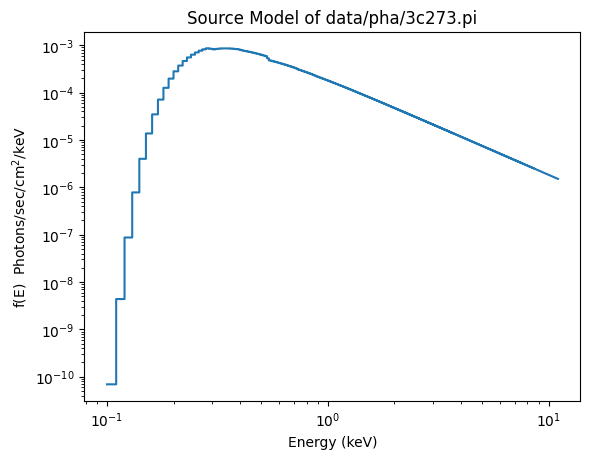

In [16]:
splot = ui.get_source_plot()
splot.plot()

In [17]:
list(zip(splot.xlo, splot.xhi, splot.y))[0:5]

[(np.float64(0.10000000149011612),
  np.float64(0.10999999940395355),
  np.float64(6.912509117109752e-11)),
 (np.float64(0.10999999940395355),
  np.float64(0.11999999731779099),
  np.float64(4.368220594867494e-09)),
 (np.float64(0.11999999731779099),
  np.float64(0.12999999523162842),
  np.float64(8.710116462453073e-08)),
 (np.float64(0.12999999523162842),
  np.float64(0.14000000059604645),
  np.float64(7.801459479338991e-07)),
 (np.float64(0.14000000059604645),
  np.float64(0.15000000596046448),
  np.float64(3.999044308067718e-06))]

## Can we create this data manually?

Let's start by seeing if we can go from the ungrouped to grouped data. I am going to
use a combination of routines from the `sherpa.astro.ui` module and methods on Sherpa
objects.

In [18]:
d = ui.get_data()

In [19]:
d

<DataPHA data set instance 'data/pha/3c273.pi'>

In [20]:
print(d)

name           = data/pha/3c273.pi
channel        = Float64[1024]
counts         = Float64[1024]
staterror      = None
syserror       = None
grouping       = Int16[1024]
quality        = Int16[1024]
exposure       = 38564.608926889
backscal       = 2.5264364698914e-06
areascal       = 1.0
grouped        = True
subtracted     = True
units          = energy
rate           = True
plot_fac       = 0
response_ids   = [1]
background_ids = [1]


We can use this to plot channels against counts (and I throw in the grouping column too), but
it doesn't really match the majesty of `plot_data`, does it?

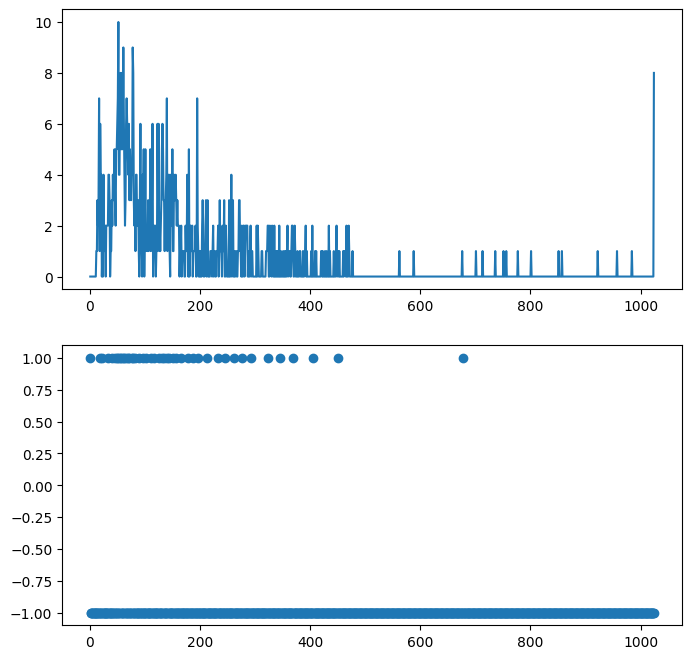

In [21]:
plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(d.channel, d.counts)

plt.subplot(2, 1, 2)
plt.plot(d.channel, d.grouping, 'o');

To make my life easier, I am going to switch `plot_data` to use channels rather than energy:

dataset 1: 33:676 Channel


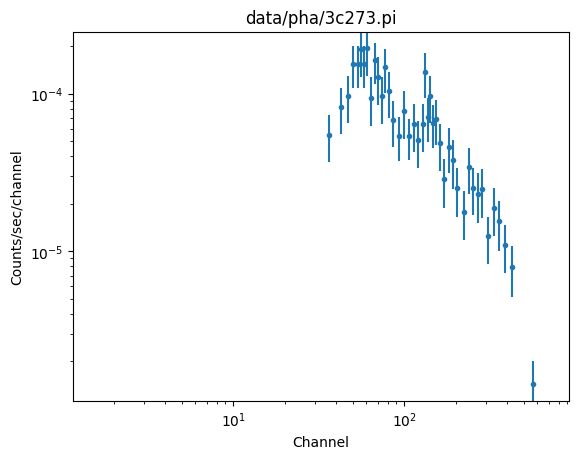

In [22]:
ui.set_analysis('channel')
pdata = ui.get_data_plot()
pdata.plot()

Our first step is to group the channel data. The grouping channel defines the mapping - a value of 1 starts the bin and -1 continues the bin, so a grouping of `[1, 1, -1, -1, 1, -1]` represents three "groups", having lengths of `[1, 3, 2]` channels. We could use some clever NumPy indexing routines, or use the CIAO `group` module. A warning, this has not been optimised for Python/NumPy use, since it is a direct translation of the underlying C code that CIAO uses to do the grouping!

There is some basic information on this module via [`ahelp group group`](http://cxc.harvard.edu/ciao/ahelp/group.html): the routines we want here are `grpGetGroupSum` and `grpGetChansPerGroup`.

In [23]:
import group

In [24]:
gcounts = group.grpGetGroupSum(d.counts, d.grouping)
gchans = group.grpGetChansPerGroup(d.grouping)

# Need to extract the value for each group; this is done by picking the
# value from the first channel in the group.
#
gfilt = d.grouping == 1

xwidth = gchans[gfilt]
xstart = d.channel[gfilt]
xend = xstart + xwidth
y = gcounts[gfilt]

So, this is getting us closer, but it still doesn't match the data plot since:

- no division by exposure time
- no division by bin width
- no filter by channel number

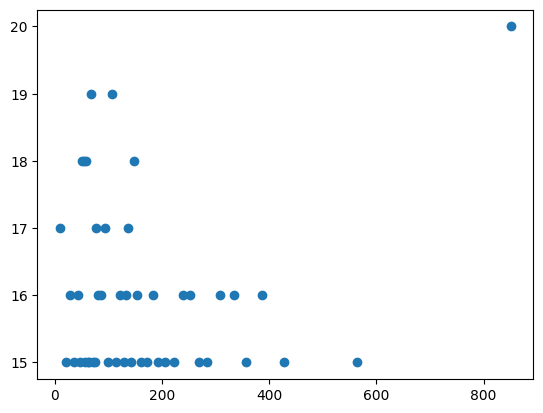

In [25]:
plt.plot((xstart + xend) / 2, y, 'o');

It's easy now to scale by the bin width, and the data object has the 
[exposure time as an attribute](https://sherpa.readthedocs.io/en/4.11.0/data/api/sherpa.astro.data.DataPHA.html#sherpa.astro.data.DataPHA.exposure). If we also add in log scaling we can see it's much closer:

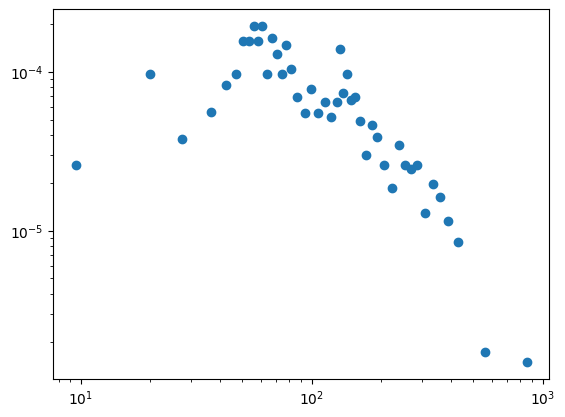

In [26]:
xmid = (xstart + xend) / 2
yscaled = y / d.exposure / xwidth

plt.plot(xmid, yscaled, 'o')
plt.xscale('log')
plt.yscale('log')

In fact, let's overplot the data to see how well we are doing:

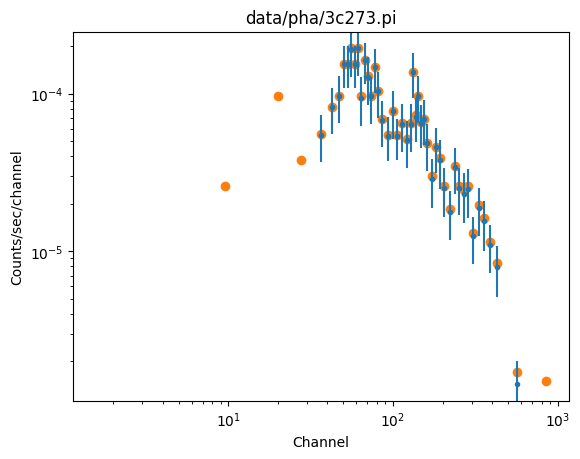

In [27]:
pdata.plot()
plt.plot(xmid, yscaled, 'o');

Apart from the filtering, I'd like to call that a success, except that the new values are larger than the old ones, because I've forgotten about background subtraction! This means we have to deal with scaling the background to the observation for both exposure time (although in this case they are the same) and extraction area (which we do with the `BACKSCAL` values [$\dagger$]):

[$\dagger$] for this Chandra dataset we don't have to worry about the `AREASCAL` value since it's the same for both source and background.

In [28]:
bkg = d.get_background()

bcounts = group.grpGetGroupSum(bkg.counts, d.grouping)

bscale = d.exposure * d.backscal / (bkg.exposure * bkg.backscal)

ysub = gcounts[gfilt] - bscale * bcounts[gfilt]
ysubscaled = ysub / d.exposure / xwidth

Actually, the `DataPHA` class has a method to calculate the background scale,
[`get_background_scale`](https://sherpa.readthedocs.io/en/latest/data/api/sherpa.astro.data.DataPHA.html#sherpa.astro.data.DataPHA.get_background_scale),
which returns the same value as I've just calculated manually:

In [29]:
print(d.get_background_scale())
print(bscale)

0.134920643888096
0.134920643888096


With this correction in place, things look a lot better.

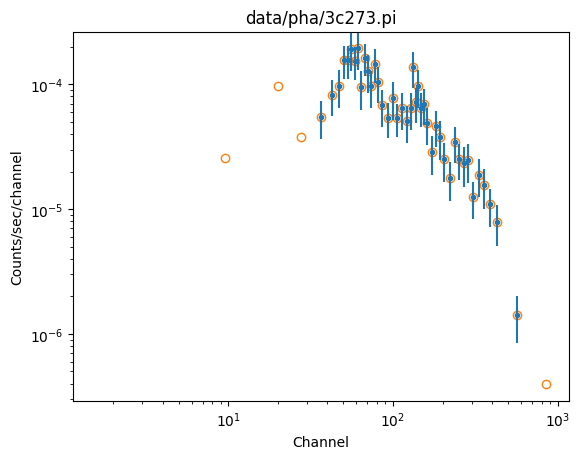

In [30]:
pdata.plot()
plt.plot(xmid, ysubscaled, 'o', fillstyle='none');

We still need to work on the spatial filter, for which we use the `mask` attribute of the data object. Note that this has already been grouped for us; ie it's length matches the number of groups not the number of channels.

In [31]:
d.channel.size, d.mask.size, ysub.size

(1024, 46, 46)

This means it is an easy filter to apply:

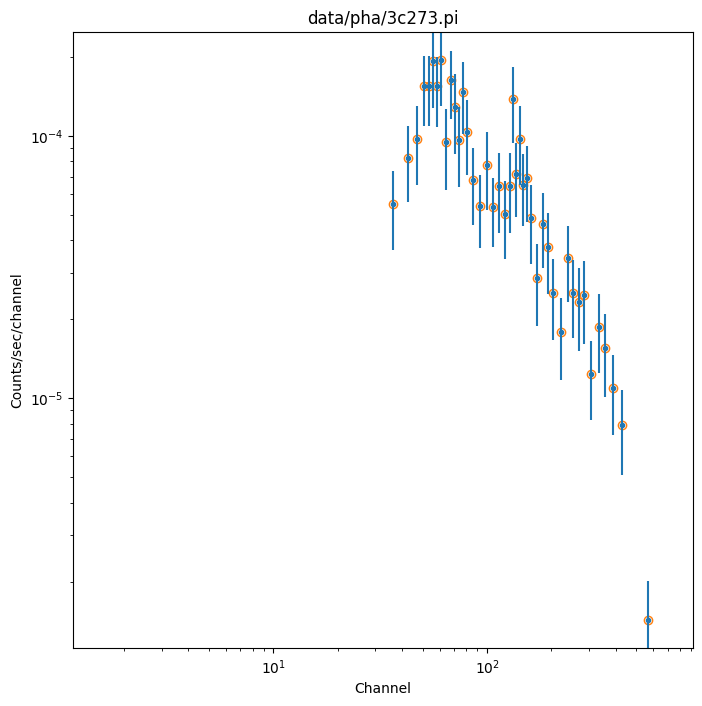

In [32]:
plt.figure(figsize=(8, 8))

pdata.plot()
plt.plot(xmid[d.mask], ysubscaled[d.mask], 'o', fillstyle='none');

We can compare are values to the plot:

In [33]:
dx = pdata.x - xmid[d.mask]
dx.min(), dx.max()

(np.float64(0.0), np.float64(0.0))

Let's try the Y axis, where I expect to see small numerical differences, but hopefully all $\lll 10^{-6}$.

In [34]:
dy = pdata.y - ysubscaled[d.mask]
dy.min(), dy.max(), np.median(dy)

(np.float64(0.0), np.float64(2.710505431213761e-20), np.float64(0.0))

Success!

## Can I re-create the model plot?

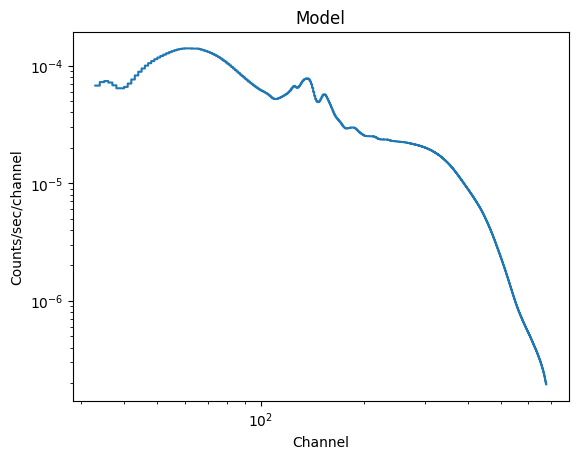

In [35]:
mplot = ui.get_model_plot()
mplot.plot()

In [36]:
list(zip(mplot.xlo, mplot.xhi))[0:5]

[(np.float64(33.0), np.float64(34.0)),
 (np.float64(34.0), np.float64(35.0)),
 (np.float64(35.0), np.float64(36.0)),
 (np.float64(36.0), np.float64(37.0)),
 (np.float64(37.0), np.float64(38.0))]

The grouped values match (at least for the first 5 entries):

In [37]:
list(zip(xstart[d.mask], xend[d.mask]))[0:5]

[(np.float64(33.0), np.float64(40.0)),
 (np.float64(40.0), np.float64(45.0)),
 (np.float64(45.0), np.float64(49.0)),
 (np.float64(49.0), np.float64(52.0)),
 (np.float64(52.0), np.float64(55.0))]

I want to be able to evaluate the source model to get the predicted values, but there are complications. The source model, as given by the user, can be retrieved with `get_source`, and the "actual" model - that includes the instrumental response - with `get_model`.

In [38]:
smdl = ui.get_source()
fmdl = ui.get_model()

print(smdl.name)
print(fmdl.name)

xsphabs.gal * powlaw1d.pl
apply_rmf(apply_arf(38564.608926889 * xsphabs.gal * powlaw1d.pl))


Normally I would just pass in the grid on which I want the model to be evaluated to these models,
but that doesn't work here because of the extra complications of the response model. Note that the
return value is 1024 elements long, even when the input grid is much smaller, for the "full model":

In [39]:
smdl([0.1, 0.2, 0.3], [0.2, 0.3, 0.4]).shape

(3,)

In [40]:
fmdl([0.1, 0.2, 0.3]).shape

(1024,)

The model is ignoring the user's grid since it knows better, and evaluating it over the PI channel space. So we can try and compare to the model plot (in this case we only have to normalize by the exposure time since the bn width is 1 by construction):

In [41]:
ymdl = fmdl([1])  # just apply an argument to get a return

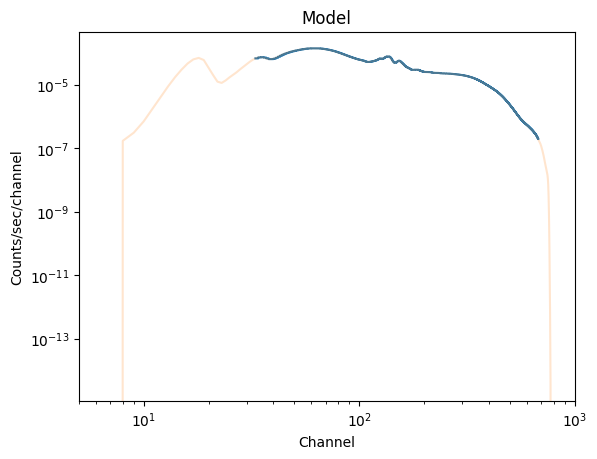

In [42]:
mplot.plot()
plt.plot(np.arange(1, 1025, 1), ymdl / d.exposure, alpha=0.2)
plt.xlim(5, 1000);

So, other than the filtering, we have the same result. We can group this to match the data using the grouping library:

In [43]:
ymdl_group = group.grpGetGroupSum(ymdl, d.grouping)
ymdl_group = ymdl_group[gfilt]

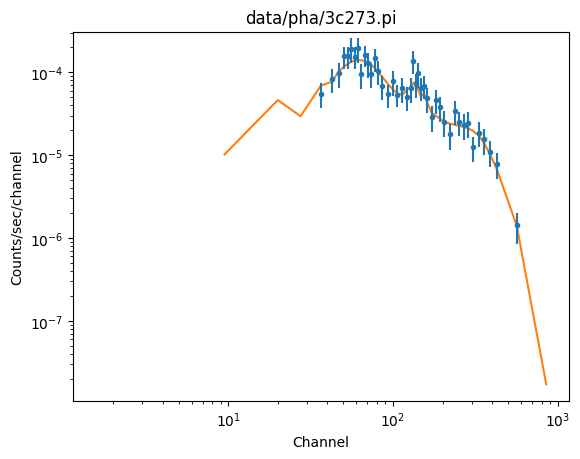

In [44]:
pdata.plot()
plt.plot(xmid, ymdl_group / d.exposure / xwidth);

## Errors

Added: March 14 2019

I've been asked about how the errors are generated in the data plot. Let's see if we can re-create them too:

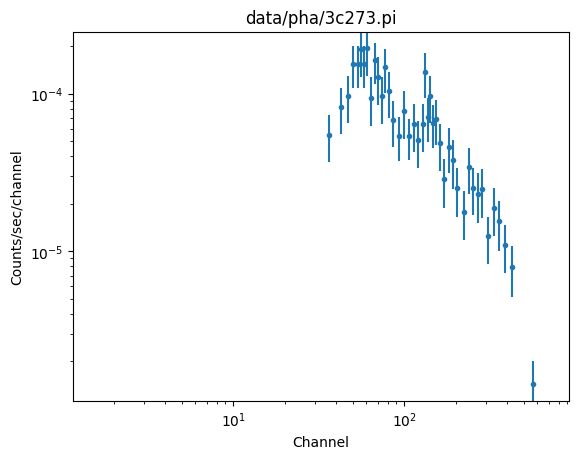

In [45]:
pdata.plot()

The error values are in the `yerr` field:

In [46]:
pdata.yerr

array([1.84421547e-05, 2.64611045e-05, 3.22510821e-05, 4.61223373e-05,
       4.61223373e-05, 6.45475413e-05, 4.61505429e-05, 6.45021643e-05,
       3.23119961e-05, 4.71339817e-05, 4.30316942e-05, 3.22737706e-05,
       4.51117488e-05, 3.30542430e-05, 2.20637980e-05, 1.69371558e-05,
       2.58008657e-05, 1.57268392e-05, 2.15158471e-05, 1.65568398e-05,
       2.15158471e-05, 4.40723240e-05, 2.25945873e-05, 3.22510821e-05,
       1.97991726e-05, 2.20361620e-05, 1.61255411e-05, 9.94756339e-06,
       1.46907747e-05, 1.29247984e-05, 8.61653228e-06, 6.15801543e-06,
       1.10254602e-05, 8.27841988e-06, 8.08664430e-06, 8.62575392e-06,
       4.14342804e-06, 6.31687220e-06, 5.39109620e-06, 3.68484212e-06,
       2.81559467e-06, 5.76279934e-07])

Earlier I used

    bkg = d.get_background()
    bcounts = group.grpGetGroupSum(bkg.counts, d.grouping)
    bscale = d.exposure * d.backscal / (bkg.exposure * bkg.backscal)
    ysub = gcounts[gfilt] - bscale * bcounts[gfilt]
    ysubscaled = ysub / d.exposure / xwidth
    
What do I need to do to get the errors? Well first, how is Sherpa calculating errors for this dataset:

In [47]:
d.staterror, ui.get_stat_name()

(None, 'chi2gehrels')

This means that Sherpa is calculating the errors: `staterror` is `None` and the statistic is
[Chi2Gehrels](https://sherpa.readthedocs.io/en/4.11.0/statistics/api/sherpa.stats.Chi2Gehrels.html), which means that the approximation for the variance on bin $i$, $V(i)$, is:

$$
V(i) = V_S(i) + [A_S/A_B]^2 V_B(i)
$$

where the suffixes $S$ and $B$ refer to the source and background regions, and $A$ is the area of the aperture. Now, how do I get $V_S$ and $V_B$? Let's try
[get_staterror](https://sherpa.readthedocs.io/en/4.11.0/ui/api/sherpa.astro.ui.get_staterror.html): I could
have used
[get_error](https://sherpa.readthedocs.io/en/4.11.0/ui/api/sherpa.astro.ui.get_error.html) but in this case
we have no systematic errors, so it isn't needed.

In [48]:
serr = ui.get_staterror()
berr = ui.get_staterror(bkg_id=1)

list(zip(serr, berr))[0:10]

[(np.float64(5.2253983239479105), np.float64(2.6583123951777)),
 (np.float64(4.978501373369197), np.float64(2.3228756555322954)),
 (np.float64(5.098895818000656), np.float64(1.8660254037844386)),
 (np.float64(4.978501373369197), np.float64(2.3228756555322954)),
 (np.float64(5.102310727828878), np.float64(2.3228756555322954)),
 (np.float64(4.9750014798134385), np.float64(1.8660254037844386)),
 (np.float64(5.336069698644923), np.float64(1.8660254037844386)),
 (np.float64(5.336069698644923), np.float64(1.8660254037844386)),
 (np.float64(4.978501373369197), np.float64(2.3228756555322954)),
 (np.float64(5.339332919877688), np.float64(2.3228756555322954))]

The Gehrels approximation - which is taken from “Confidence limits for small numbers of events in astrophysical data”, Gehrels, N. 1986, ApJ, vol 303, p. 336-346. http://adsabs.harvard.edu/abs/1986ApJ…303..336G - is

$$
\sigma_X(i) = 1 + \sqrt{ N_X(i) + 0.75 }
$$

where $V_X(i) = \sigma_X(i)^2$, $\sigma_X(i)$ is the value returned by `get_staterror`, and $N_X$ is the number of counts in bin $i$ for a given component $X$. So we can check the background values as there's no "correction" terms:

In [49]:
check_berr = 1 + np.sqrt(bcounts[gfilt] + 0.75)

bdiff = check_berr - berr
bdiff.min(), bdiff.max()

(np.float64(0.0), np.float64(0.0))

Yay, success.

### An aside: calculating error values

Rather than hard-code the formula, we can use the low-level `sherpa.stats` API to calculate errors for us (which lets you change the error approximation "easily"). We need two things: an array of counts and a Sherpa stats object.

Let's try a few statistics from [sherpa.stats](https://sherpa.readthedocs.io/en/4.11.0/statistics/stats.html):
`Chi2Gehrels`, which I've already talked about, and
[`Chi2DataVar`](https://sherpa.readthedocs.io/en/4.11.0/statistics/api/sherpa.stats.Chi2DataVar.html),
which just implements the approximation $V_i(X) = N_i(X)$.

In [50]:
from sherpa.stats import Chi2Gehrels, Chi2DataVar

stat1 = Chi2Gehrels()
stat2 = Chi2DataVar()

In [51]:
# It's about this time of the notebook I realise that I should really have applied the gfilt
# filter to the source and background count arrays and created new variables!

stat1.calc_staterror(bcounts[gfilt])[0:10]

array([2.6583124 , 2.32287566, 1.8660254 , 2.32287566, 2.32287566,
       1.8660254 , 1.8660254 , 1.8660254 , 2.32287566, 2.32287566])

In [52]:
stat2.calc_staterror(bcounts[gfilt])[0:10]

array([1.41421356, 1.        , 0.        , 1.        , 1.        ,
       0.        , 0.        , 0.        , 1.        , 1.        ])

So, we can see that we can switch object to switch approximation (the class has more functionality than
just the calculation of an error, otherwise a simple function could have been used)!

### end aside

I'm sure my diversion hasn't diverted you from the quest to apply this to the data values, so let's see
what happens, remembering that we calculated the background-subtracted counts as:

    ysub = gcounts[gfilt] - bscale * bcounts[gfilt]
    ysubscaled = ysub / d.exposure / xwidth

In [53]:
yvar = stat1.calc_staterror(gcounts[gfilt])**2 + bscale**2 * stat1.calc_staterror(bcounts[gfilt])**2
check_serr = np.sqrt(yvar)

sdiff = check_serr - serr
sdiff.min(), sdiff.max()

(np.float64(-8.881784197001252e-16), np.float64(0.0))

:kermit-flail

However, this doesn't show that we can calculate the plot errors, but it *should* just be a simple
scaling away:

In [54]:
check_ploterr = check_serr / d.exposure / xwidth

The first thing to remember is that we don't match up on size, so we can't do a direct comparison,
although the previous plots have shown it's the first three and last bin of our manually-created
data that differs, so we can just filter them out for a comparison:

In [55]:
pdata.yerr.size, check_ploterr.size

(42, 46)

In [56]:
delta = pdata.yerr - check_ploterr[3:-1]
delta.min(), delta.max()

(np.float64(0.0), np.float64(3.3881317890172014e-21))

In case you glory in visualizations rather than the cold, hard, beauty of numbers, we can plot the values,
taking advantage of the poorly-documented `clearwidow` option of the 
[plot method](https://sherpa.readthedocs.io/en/4.11.0/plots/api/sherpa.plot.DataPlot.html#sherpa.plot.DataPlot.plot) to add
the Sherpa plot to the Matplotlib layout without destroying the existing setup.

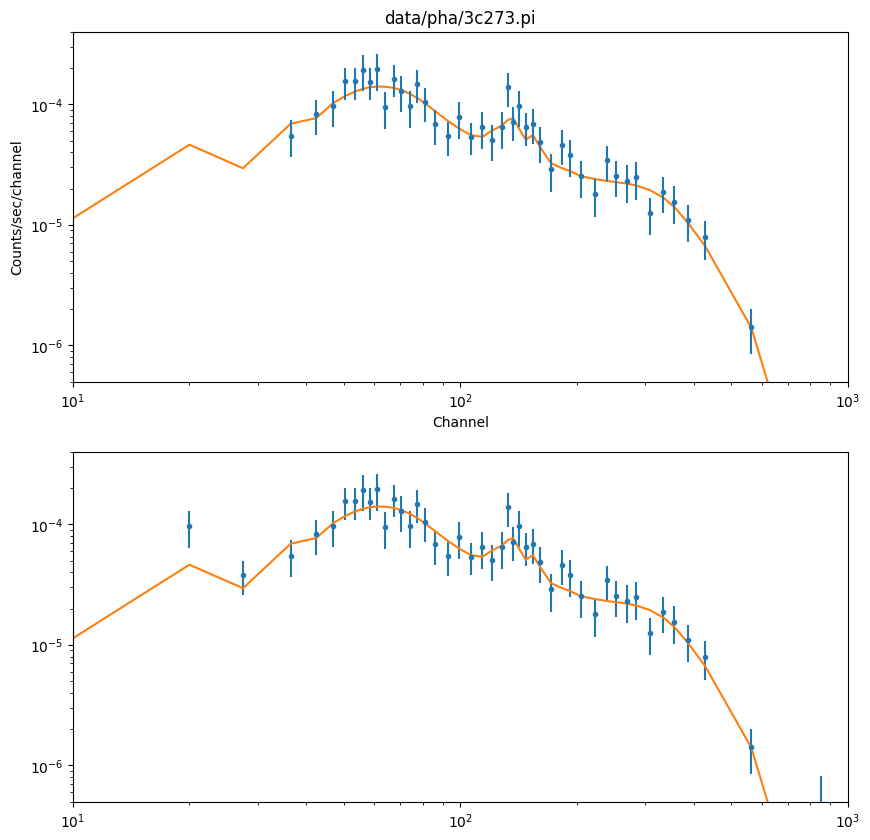

In [57]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
pdata.plot(clearwindow=False)
plt.plot(xmid, ymdl_group / d.exposure / xwidth)

plt.xlim(10, 1000)
plt.ylim(5e-7, 4e-4)
plt.subplot(2, 1, 2)

plt.errorbar(xmid, ysubscaled, yerr=check_ploterr, fmt='.')
plt.plot(xmid, ymdl_group / d.exposure / xwidth)

plt.xlim(10, 1000)
plt.ylim(5e-7, 4e-4)
plt.xscale('log')
plt.yscale('log')

The model line is shown in both to help convince you the results are the same!